# 1- Load data

Firstly, you should download data from classroom. Then upload it to the colab enviroment through files section in the side bar

In [ ]:
import pandas as pd

car_prices_data =  pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
car_prices_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 2- Explore Data

You may choose one or more method like: info , discribe , check for missing data ,etc.

In [ ]:
car_prices_data.shape

(205, 26)

In [ ]:
car_prices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# show some statistical details about the data_frame such as count, mean, std (of each column)
car_prices_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# check for missing data
missing = car_prices_data.isnull().sum()
print(missing) # no missing data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


# 3- Sperate features

## Quantitvative Data

In [ ]:
quantitative = [f for f in car_prices_data.columns if car_prices_data.dtypes[f] != 'object']  # column names with quantitive data
print(quantitative)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
quantitative_data = car_prices_data[quantitative]
quantitative_data # 16 out of the 26 columns contain quantitive data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## Qualitative Data




In [ ]:
qualitative = [f for f in car_prices_data.columns if car_prices_data.dtypes[f] == 'object'] # column names with qualitative data
print(qualitative)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
qualitative_data = car_prices_data[qualitative]
qualitative_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


# 4 - Visulaization

## Output
The output is 'price' coloum

In [ ]:
output = car_prices_data['price']
print(output)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


<function matplotlib.pyplot.show>

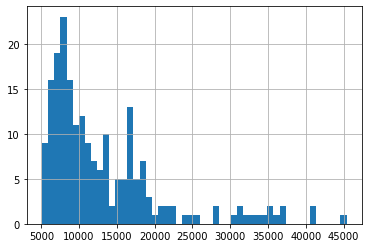

In [ ]:
import matplotlib.pyplot as plt
# visualizing the output as a histogram
output.hist(bins=50)
plt.show

## Quantitvative Data

Use histogram or any other preferred method you prefer to visualize your data (one feature is enough)

In [ ]:
# removing Car_Id variable because it has a unique value for each entry and a histogram would have no meaning

quantitative_mod=quantitative.copy()
quantitative_mod.remove('car_ID')


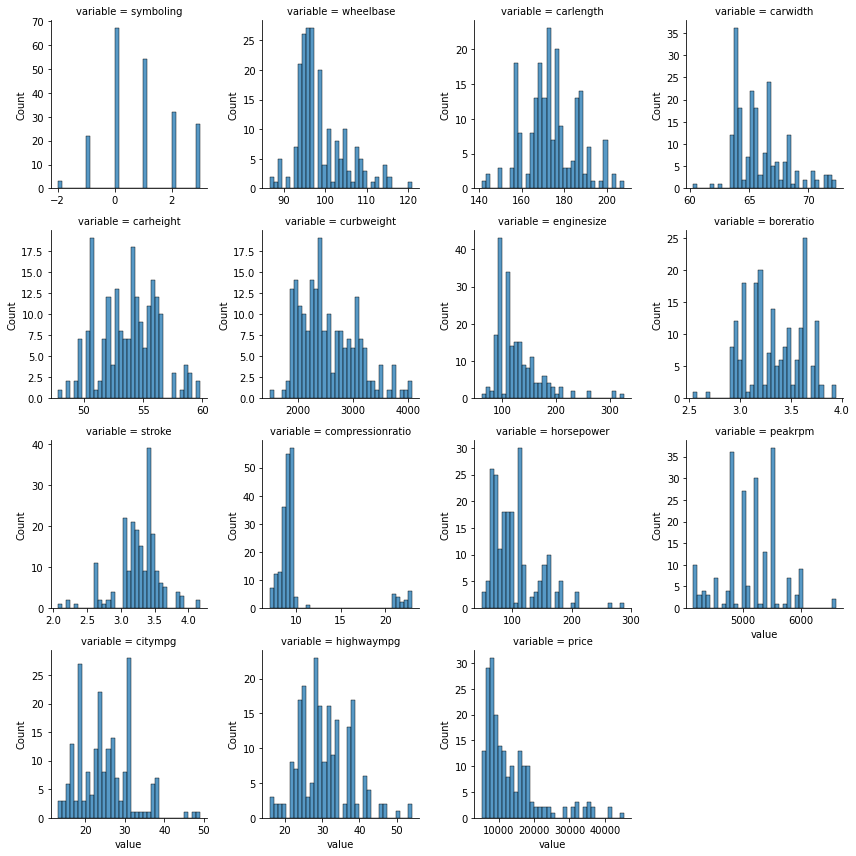

In [ ]:
# another method of visualizing the data as a histogram
import seaborn as sns
f = pd.melt(car_prices_data, value_vars = quantitative_mod)
g = sns.FacetGrid(f, col="variable",  col_wrap = 4, sharex=False, sharey=False) # visualizing distribution of one variable
g = g.map(sns.histplot, "value", bins = 35 )

Visualize the Correlation Matrix

In [ ]:
corr_matrix = quantitative_data.corr() # get the correlation matrix between each two columns of the data including the clumn itself
print(corr_matrix)

                    car_ID  symboling  ...  highwaympg     price
car_ID            1.000000  -0.151621  ...    0.011255 -0.109093
symboling        -0.151621   1.000000  ...    0.034606 -0.079978
wheelbase         0.129729  -0.531954  ...   -0.544082  0.577816
carlength         0.170636  -0.357612  ...   -0.704662  0.682920
carwidth          0.052387  -0.232919  ...   -0.677218  0.759325
carheight         0.255960  -0.541038  ...   -0.107358  0.119336
curbweight        0.071962  -0.227691  ...   -0.797465  0.835305
enginesize       -0.033930  -0.105790  ...   -0.677470  0.874145
boreratio         0.260064  -0.130051  ...   -0.587012  0.553173
stroke           -0.160824  -0.008735  ...   -0.043931  0.079443
compressionratio  0.150276  -0.178515  ...    0.265201  0.067984
horsepower       -0.015006   0.070873  ...   -0.770544  0.808139
peakrpm          -0.203789   0.273606  ...   -0.054275 -0.085267
citympg           0.015940  -0.035823  ...    0.971337 -0.685751
highwaympg        0.01125

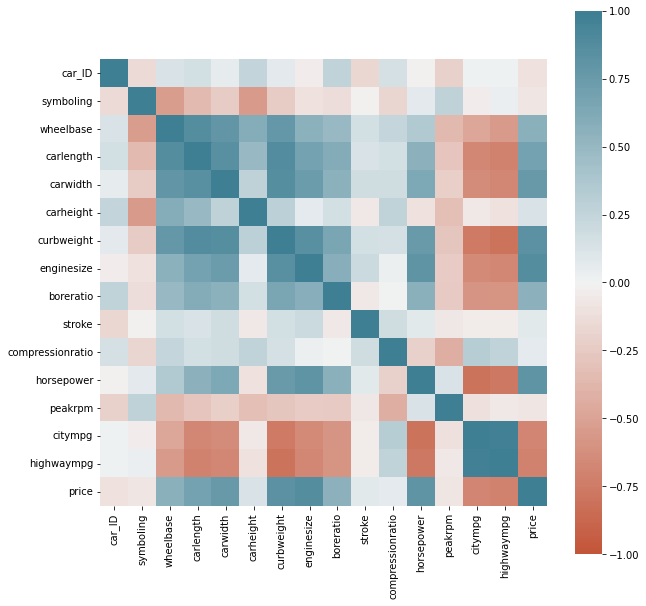

In [ ]:
## visualizing the correlation matrix using a heatmap
import seaborn as sns
plt.subplots(figsize=(10,10))

ax = sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)



In [ ]:
# showing the correlation of all features with the output specified
corr_matrix['price'].sort_values(ascending=False)  # choosing a specific column from the correlation matrix

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Choose one variable and do your analysis on it. Give insights!

Consider the following:

1. Its visualization
2. Missing data
3. Correlation with the output
4. Description of the feature

The number of missing data = 0

Correlation between curbweight and the output is = 0.8353048793372965

Descritpion of the Feature: 


count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

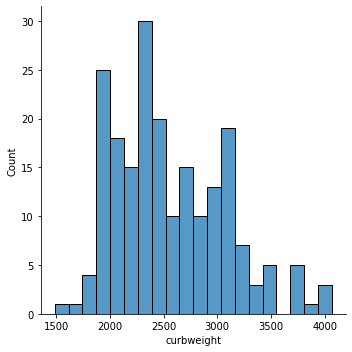

In [ ]:
# 'curbweight' variable
import seaborn as sns
y=car_prices_data['curbweight']
ax= sns.displot(data=y, kde=False, bins = 20)
#missing data
m_data = missing['curbweight']
print('The number of missing data = '+str(m_data)+'\n')

# Correlation with the output
Correlation_=corr_matrix['price']['curbweight']
print('Correlation between curbweight and the output is = '+str(Correlation_)+'\n')

# Description of the feature
print('Descritpion of the Feature: ')
car_prices_data['curbweight'].describe()


Description of the feature:

The Curb weight feature discribes the weight of the vehicle including a full tank of fuel and all standard equipment. Most of the cars considered have weights around 2555. Since the correlation coefficient is quite high, heavier vehicles have higher prices. The heavy weight provides better crash protection. however, it also increases fuel consumption. Thus vehicle prices increases with the weight but to a certain limit.

## Qualitative Data

Use boxplot or any other preferred method you prefer to visualize your data (one feature is enough)

In [ ]:
# removing CarName variable because it has numerous different values and a boxplot would not be useful
qualitative_mod=qualitative.copy()
qualitative_mod.remove('CarName')

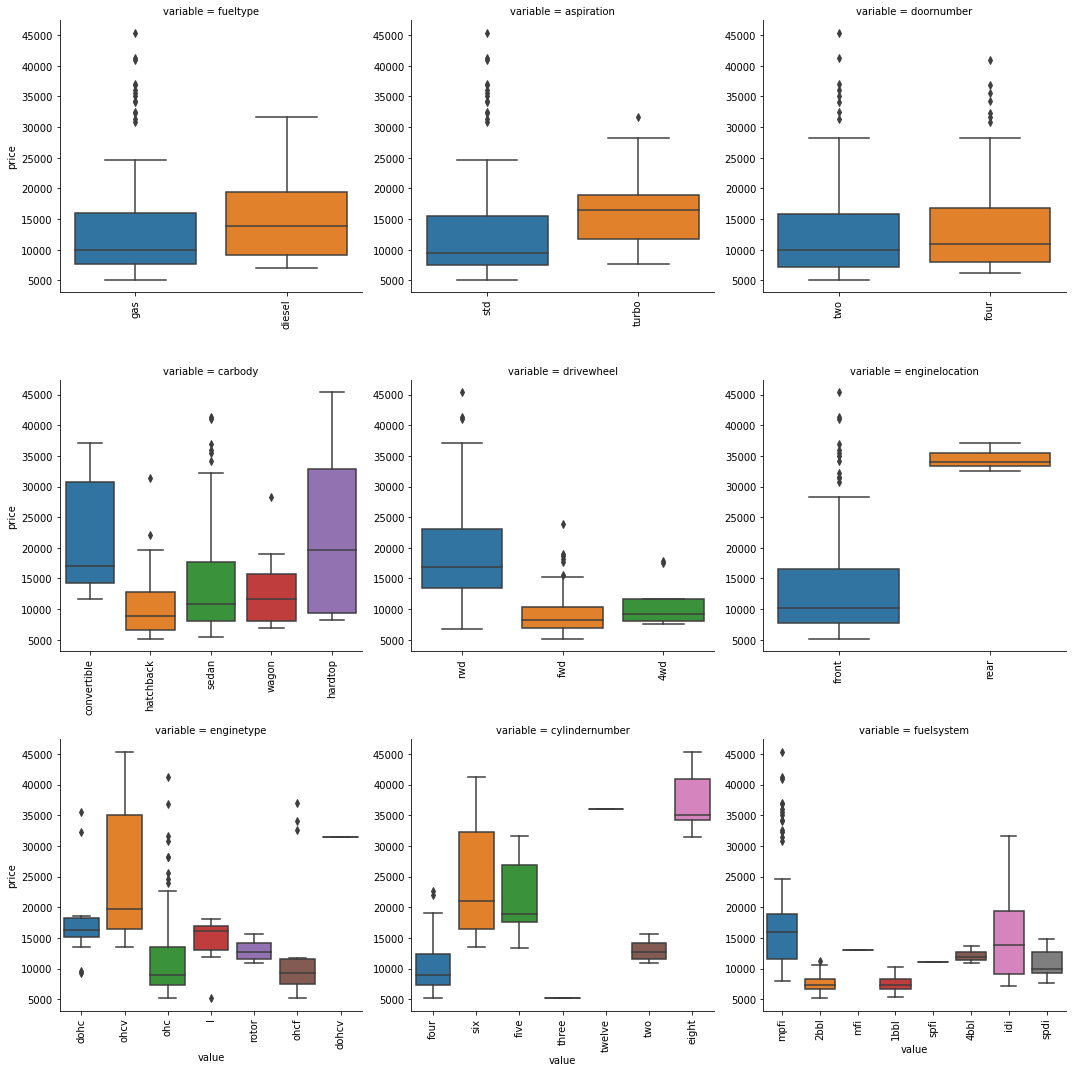

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

#create a box plot to show how the output changes with qualitative features
f = pd.melt(car_prices_data, id_vars=['price'], value_vars=qualitative_mod)
g = sns.FacetGrid(f, col="variable",  col_wrap = 3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", 'price')

Choose one variable and do your analysis on it.

Consider the following:

1. Its visualization
2. Missing data
3. Correlation with the output
4. Description of the feature

The number of missing data = 0



count      205
unique       7
top       four
freq       159
Name: cylindernumber, dtype: object

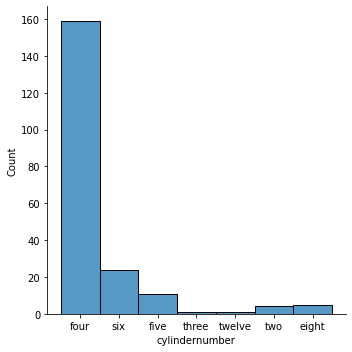

In [ ]:
# 'cylindernumber' variable
import seaborn as sns
y=car_prices_data['cylindernumber']
ax= sns.displot(data=y, kde=False)

# Missing data
m_data = missing['cylindernumber']
print('The number of missing data = '+str(m_data)+'\n')

# Description of the feature
car_prices_data['cylindernumber'].describe()


Description of the feature:

cylindernumber feature represents the size of the engine a vehicle has. Most of the cars considred in the data set have 4 cylinders. Vehicles with 8 cylinders have heighest prices. The more cylinders, the more power a car can generate which clearly would affect its price.

In [ ]:
# finding the correlation between the cylindernumber and price
# since cylindernumber is a qualitative variable, we need to use encoding
import numpy as np
data = car_prices_data[['price']+['cylindernumber']]
df_encoding = pd.get_dummies(data['cylindernumber']) # one-hot encoding the qualitative variable

df_new = pd.concat([data,df_encoding], axis = 1)
del df_new['cylindernumber']
df_new

,price,eight,five,four,six,three,twelve,two
0,13495.0,0,0,1,0,0,0,0
1,16500.0,0,0,1,0,0,0,0
2,16500.0,0,0,0,1,0,0,0
3,13950.0,0,0,1,0,0,0,0
4,17450.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
200,16845.0,0,0,1,0,0,0,0
201,19045.0,0,0,1,0,0,0,0
202,21485.0,0,0,0,1,0,0,0
203,22470.0,0,0,0,1,0,0,0


In [ ]:
x = df_new.values
correlation_matrix= np.corrcoef(x.T) # get the correlation of the given array
correlation_matrix

array([[ 1.        ,  0.47861443,  0.24960592, -0.69776166,  0.47497791,
        -0.07138775,  0.19963357, -0.00454416],
       [ 0.47861443,  1.        , -0.03765004, -0.29396096, -0.05757532,
        -0.01107019, -0.01107019, -0.02230499],
       [ 0.24960592, -0.03765004,  1.        , -0.44270571, -0.08670853,
        -0.01667172, -0.01667172, -0.03359135],
       [-0.69776166, -0.29396096, -0.44270571,  1.        , -0.67699581,
        -0.1301681 , -0.1301681 , -0.26227181],
       [ 0.47497791, -0.05757532, -0.08670853, -0.67699581,  1.        ,
        -0.02549478, -0.02549478, -0.05136867],
       [-0.07138775, -0.01107019, -0.01667172, -0.1301681 , -0.02549478,
         1.        , -0.00490196, -0.00987681],
       [ 0.19963357, -0.01107019, -0.01667172, -0.1301681 , -0.02549478,
        -0.00490196,  1.        , -0.00987681],
       [-0.00454416, -0.02230499, -0.03359135, -0.26227181, -0.05136867,
        -0.00987681, -0.00987681,  1.        ]])

In [ ]:
# get the correltion between the output and each value of the categorical variable
correlation_matrix[0]

array([ 1.        ,  0.47861443,  0.24960592, -0.69776166,  0.47497791,
       -0.07138775,  0.19963357, -0.00454416])

In [ ]:
# Correlation with the output-----> check if qualitative and a quantitive features are correlated using the ANOVA test
# if P-value is greater that 0.05-----> the variables are not correlated
import pandas as pd
data = car_prices_data[['price']+['cylindernumber']]
data

from scipy.stats import f_oneway

# group prices data for each cylindernumber as a list
group_lists = data.groupby('cylindernumber')['price'].apply(list) # contain a list of prices fo each cylinder number
group_lists

# ANOVA test
AnovaResults = f_oneway(*group_lists)
AnovaResults[1] # P-value is less that 0.05-----> thus the two variables are correlated

8.065780498463557e-41

In [ ]:
group_lists

cylindernumber
eight         [34184.0, 35056.0, 40960.0, 45400.0, 31400.5]
five      [17450.0, 15250.0, 17710.0, 18920.0, 23875.0, ...
four      [13495.0, 16500.0, 13950.0, 16430.0, 16925.0, ...
six       [16500.0, 20970.0, 21105.0, 24565.0, 30760.0, ...
three                                              [5151.0]
twelve                                            [36000.0]
two                    [10945.0, 11845.0, 13645.0, 15645.0]
Name: price, dtype: object